**3.Number Recognition:**

Handwritten digit recognition system not only detects scanned images of handwritten digits.Handwritten digit recognition using MNIST dataset is a major project made with the help of Neural Network. It basically detects the scanned images of handwritten digits.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 59s 136ms/step - loss: 0.3647 - accuracy: 0.8900 - val_loss: 0.0865 - val_accuracy: 0.9745
Epoch 2/5
422/422 [==============================] - 54s 127ms/step - loss: 0.1175 - accuracy: 0.9644 - val_loss: 0.0598 - val_accuracy: 0.9838
Epoch 3/5
422/422 [==============================] - 52s 122ms/step - loss: 0.0863 - accuracy: 0.9736 - val_loss: 0.0468 - val_accuracy: 0.9873
Epoch 4/5
422/422 [==============================] - 51s 120ms/step - loss: 0.0725 - accuracy: 0.9778 - val_loss: 0.0449 - val_accuracy: 0.9865
Epoch 5/5
422/422 [==============================] - 52s 124ms/step - loss: 0.0637 - accuracy: 0.9801 - val_loss: 0.0379 - val_accuracy: 0.9902


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.037861473858356476
Test accuracy: 0.9868000149726868


In [ ]:
model.save('mnist_model.h5')

In [ ]:
model = tf.keras.models.load_model('mnist_model.h5')

In [ ]:
from keras.preprocessing import image
from PIL import Image

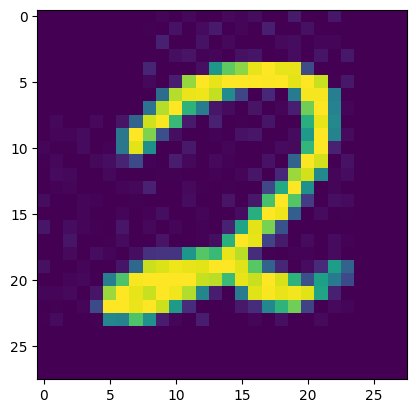

1/1 [==============================] - 0s 26ms/step
Predicted digit: 2


In [ ]:
image = plt.imread('/content/mnist 2.jpg')
plt.imshow(image)
plt.show()

uploaded_image = Image.open('/content/mnist 2.jpg').convert('L')
uploaded_image = uploaded_image.resize((28, 28))
uploaded_image_array = np.array(uploaded_image)
uploaded_image_array = uploaded_image_array.astype('float32') / 255
uploaded_image_array = np.reshape(uploaded_image_array, (1, 28, 28, 1))

predictions = model.predict(uploaded_image_array)
predicted_digit = np.argmax(predictions[0])

print('Predicted digit:', predicted_digit)

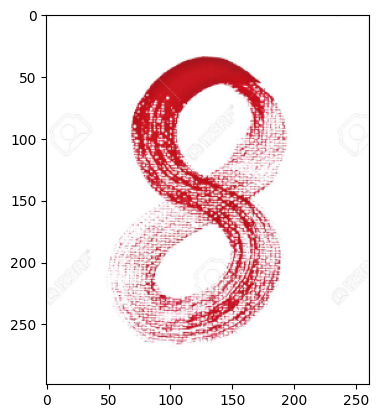

1/1 [==============================] - 0s 28ms/step
Predicted digit: 8


In [ ]:
image = plt.imread('/content/mnist 8.jpg')
plt.imshow(image)
plt.show()

uploaded_image = Image.open('/content/mnist 8.jpg').convert('L')
uploaded_image = uploaded_image.resize((28, 28))
uploaded_image_array = np.array(uploaded_image)
uploaded_image_array = uploaded_image_array.astype('float32') / 255
uploaded_image_array = np.reshape(uploaded_image_array, (1, 28, 28, 1))

predictions = model.predict(uploaded_image_array)
predicted_digit = np.argmax(predictions[0])

print('Predicted digit:', predicted_digit)

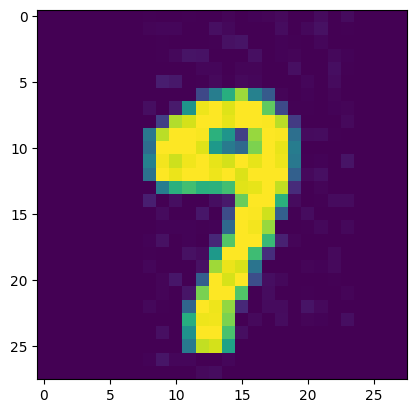

1/1 [==============================] - 0s 55ms/step
Predicted digit: 9


In [ ]:
image = plt.imread('/content/mnist 9.jpg')
plt.imshow(image)
plt.show()

uploaded_image = Image.open('/content/mnist 9.jpg').convert('L')
uploaded_image = uploaded_image.resize((28, 28))
uploaded_image_array = np.array(uploaded_image)
uploaded_image_array = uploaded_image_array.astype('float32') / 255
uploaded_image_array = np.reshape(uploaded_image_array, (1, 28, 28, 1))

predictions = model.predict(uploaded_image_array)
predicted_digit = np.argmax(predictions[0])

print('Predicted digit:', predicted_digit)